## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [16]:
cu=pd.read_csv('cust_demographics.csv')

In [17]:
cu

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [18]:
cl=pd.read_csv('claims (1).csv')

In [19]:
cl.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
5,24050443,21831191,Other driver error,10/04/2017,Auto,No,Injury only,$38306.5,3.0,Yes
6,12878692,18401412,Driver error,01/13/2018,Auto,No,Material only,$1730,4.0,No
7,27026412,73486606,Natural causes,04/10/2018,Auto,No,Material only,$1160,3.0,No
8,43908336,32813689,Crime,02/15/2018,Auto,Unknown,Material only,$2620,1.0,No
9,63246959,33507197,Crime,07/22/2017,Auto,No,Material only,$2748.5,2.0,Yes


In [30]:
cl['incident_cause'].unique()

array(['Driver error', 'Crime', 'Other driver error', 'Natural causes',
       'Other causes'], dtype=object)

In [21]:
cl=cl.rename(columns={'customer_id':'CUST_ID'})

In [22]:
cul=pd.merge(cl,cu,how='inner',on='CUST_ID')

In [23]:
cul.head()

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver


# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign


In [120]:
cul['claim_amount']=cul['claim_amount'].str.replace("$","")

C:\Users\Nishant kmr\AppData\Local\Temp\ipykernel_17376\1278659700.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cul['claim_amount']=cul['claim_amount'].str.replace("$","")


In [28]:
def fi(x):
    try:
        return int(x)
    except:
        None

In [29]:
cul['claim_amount']=cul['claim_amount'].apply(fi)

# 2. Perform a data audit for the datatypes and find out if there are anymismatch within the current datatypes of the columns and their business significance.


In [123]:
cul["Contact"] = cul['Contact'].str.replace("-","")

In [124]:
def ff(x):
    try:
        return float(x)
    except:
        None

In [125]:
cul["Contact"] = cul['Contact'].apply(ff)

In [304]:
cul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   CUST_ID              1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   claim_type           1085 non-null   object        
 6   claim_amount         1085 non-null   int64         
 7   total_policy_claims  1085 non-null   float64       
 8   fraudulent           1085 non-null   object        
 9   gender               1085 non-null   object        
 10  DateOfBirth          1085 non-null   datetime64[ns]
 11  State                1085 non-null   object        
 12  Contact              1085 non-null   float64       
 13  Segment              1085 non-nul

In [127]:
cul.head(2)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,7.899168e+09,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,2.655431e+09,Silver


In [128]:
cul['DateOfBirth']=pd.to_datetime(cul.DateOfBirth, format = "%d-%b-%y")

In [129]:
cul['claim_date']=pd.to_datetime(cul.claim_date, format = "%m/%d/%Y")


In [26]:
cul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   CUST_ID              1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims


In [131]:
def ab(x):
    if x=='Yes':
        return 1
    elif x=='No':
        return 0
    else:
        return np.nan

In [132]:
cul['flag']=cul['police_report'].apply(ab)

In [133]:
cul.drop(columns=['police_report'],inplace=True)

# 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.


In [134]:
cul.groupby('CUST_ID').first().reset_index(drop=True)

,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag
0,69348631,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,Female,1978-05-23,DE,9.628791e+09,Platinum,0.0
1,40953049,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,Male,1972-12-20,TX,1.738926e+09,Silver,0.0
2,45780237,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,Male,1988-07-28,FL,3.645982e+09,Silver,NaN
3,89833962,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,Male,1971-08-19,CA,1.873488e+09,Gold,1.0
4,35782742,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,Female,1980-08-10,NC,7.988625e+09,Gold,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,4549014,Other causes,2018-07-07,Auto,Injury only,21480.0,1.0,No,Male,2065-01-28,UT,5.175625e+09,Silver,0.0
1074,35453672,Natural causes,2018-01-06,Auto,Material and injury,14360.0,1.0,No,Female,2066-06-19,HI,4.577521e+09,Gold,1.0
1075,37305754,Natural causes,2018-04-04,Auto,Material only,1242.0,1.0,Yes,Female,2063-11-18,NC,6.432465e+09,Silver,0.0
1076,22960702,Driver error,2017-11-13,Auto,Material only,2415.0,2.0,Yes,Male,1995-06-08,OR,3.952466e+09,Gold,0.0


# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [136]:
cul['claim_amount'].isna().sum()

65

In [137]:
cul['flag']=cul['flag'].fillna(cul['flag'].mode()[0])

In [138]:
cul['claim_amount'] = cul['claim_amount'].fillna(cul['claim_amount'].mean())

In [139]:
cul['total_policy_claims'] = cul['total_policy_claims'].fillna(cul['total_policy_claims'].mean())

In [477]:
cul.head(2)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,age,age_group,month,year,Frauds
0,54004764,21868593,driver error,2017-11-27,Auto,Material only,2980,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.0,39.0,Adult,11,2017,0
1,33985796,75740424,crime,2018-10-03,Home,Material only,2980,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver,0.0,49.0,Adult,10,2018,0


In [141]:
cul.isnull().sum()

claim_id               0
CUST_ID                0
incident_cause         0
claim_date             0
claim_area             0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
flag                   0
dtype: int64

# 7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria

Children < 18

Youth 18-30

Adult 30-60

Senior > 60


In [307]:
cul.loc[(cul.DateOfBirth.dt.year > 2020),"DateOfBirth"]=cul[cul.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

In [308]:
cul['age']=round((cul.claim_date - cul.DateOfBirth)/np.timedelta64(1, 'Y'))

In [309]:
cul['age_group'] = np.where(cul.age <18,'Childen',np.where(cul.age<30,'Youth',np.where(cul.age<60,'Adult',np.where(cul.age>60,'Senior',np.NaN))))

# 8. What is the average amount claimed by the customers from various Segments?


In [310]:
cul[['claim_amount','Segment']].groupby('Segment').agg({'claim_amount':['mean']})

,claim_amount
,mean
Segment,
Gold,12829.544000
Platinum,12341.867403
Silver,12208.341954


# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.


In [467]:
cul['claim_amount'].sum()

13527338

In [469]:
cul[cul.claim_date < "2018-09-10"].groupby("incident_cause").agg({'claim_amount':['sum']})

,claim_amount
,sum
incident_cause,
crime,724438
driver error,3319932
natural causes,1314108
other causes,3724962
other driver error,3318748


# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?


In [312]:
cul['incident_cause']=cul['incident_cause'].str.lower()

In [313]:
cul.head(2)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,age,age_group,month,year
0,54004764,21868593,driver error,2017-11-27,Auto,Material only,2980,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.0,39.0,Adult,11,2017
1,33985796,75740424,crime,2018-10-03,Home,Material only,2980,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver,0.0,49.0,Adult,10,2018


In [314]:
def acc(x):
    if 'driver' in x:
        return x
    else:
        return None

In [315]:
a=cul['incident_cause'].str.contains('driver')
 

In [316]:
b=(cul['State']=='TX')| (cul['State']=='DE')| (cul['State']=='AK')

In [317]:
cul[a&b].groupby('State').agg({'State':['count']})

,State
,count
State,
AK,11
DE,15
TX,10


# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


In [495]:
y=cul.groupby(['gender','Segment'])['claim_amount'].sum().reset_index()
y

,gender,Segment,claim_amount
0,Female,Gold,2109722
1,Female,Platinum,2369472
2,Female,Silver,1901896
3,Male,Gold,2701357
4,Male,Platinum,2098284
5,Male,Silver,2346607


<AxesSubplot:ylabel='claim_amount'>

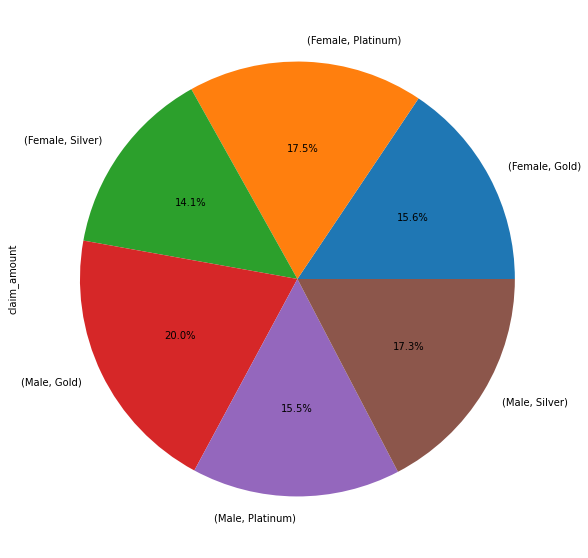

In [319]:
cul.groupby(['gender','Segment'])['claim_amount'].sum().plot(kind='pie',autopct=('%2.1f%%'),figsize = (12,10))


# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


In [324]:
a=cul['incident_cause'].str.contains('driver')
 

In [325]:
cul[a].groupby('gender')['gender'].count()

gender
Female    222
Male      284
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender'>

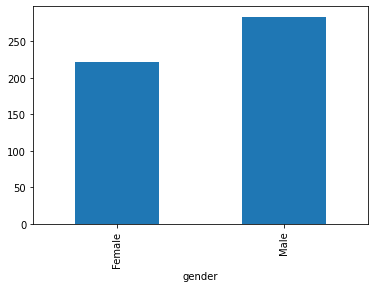

In [326]:
cul[a].groupby('gender')['gender'].count().plot(kind='bar')


# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


In [493]:
cul['fraudulent'].count()

1085

In [492]:
abc=cul['fraudulent']=='Yes'
cul[abc].head(2)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,age,age_group,month,year,Frauds
2,53522022,30308357,other driver error,2018-02-02,Auto,Material only,3369,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0.0,34.0,Adult,2,2018,1
8,24050443,21831191,other driver error,2017-10-04,Auto,Injury only,38306,3.0,Yes,Male,1977-05-17,NH,4.197129e+09,Gold,0.0,40.0,Adult,10,2017,1


In [490]:
cul[abc].groupby('age_group')['fraudulent'].count()

age_group
Adult    174
Youth     73
Name: fraudulent, dtype: int64

<AxesSubplot:xlabel='age_group'>

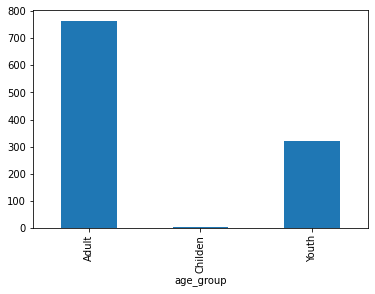

In [491]:
cul.groupby('age_group')['fraudulent'].count().plot(kind='bar',)

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.


In [288]:
cul.head()

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,age,age_group,month,year
0,54004764,21868593,driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.0,39.0,Adult,11,2017
1,33985796,75740424,crime,2018-10-03,Home,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver,0.0,49.0,Adult,10,2018
2,53522022,30308357,other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0.0,34.0,Adult,2,2018
3,63017412,30308357,driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,Female,1984-03-11,TN,7.986315e+09,Silver,0.0,34.0,Adult,4,2018
4,13015401,47830476,natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4.131878e+09,Silver,0.0,32.0,Adult,6,2018


In [280]:
cul['month']= cul['claim_date'].dt.month

In [282]:
cul['year']= cul['claim_date'].dt.year

In [470]:
cul.groupby('month').claim_amount.sum()

month
1     1331982
2     1169898
3     1320071
4     1293881
5     1114179
6     1278819
7     1378999
8      911189
9      982849
10    1447660
11     601115
12     696696
Name: claim_amount, dtype: int64

<AxesSubplot:xlabel='month'>

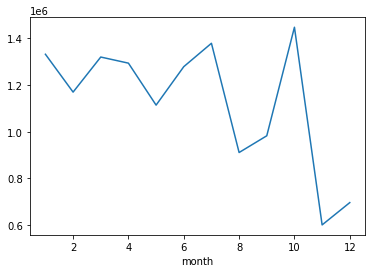

In [328]:
cul.groupby('month').claim_amount.sum().plot(kind='line')

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims. Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.


In [455]:
f=cul.loc[(cul.fraudulent=='Yes')].groupby(['gender','age_group',])['claim_amount'].mean().reset_index(name='mean')
nf=cul.loc[(cul.fraudulent=='No')].groupby(['gender','age_group'])['claim_amount'].mean().reset_index(name='mean')

In [456]:
e=nf.pivot(index='age_group',columns='gender',values='mean')

In [457]:
ef=f.pivot(index='age_group',columns='gender',values='mean')

<AxesSubplot:title={'center':'fraudulent=Yes'}, xlabel='age_group'>

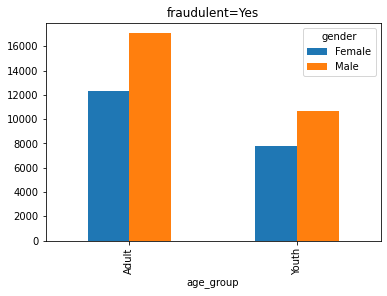

In [458]:
ef.plot(kind='bar',title='fraudulent=Yes')

<AxesSubplot:title={'center':'fraudulent=No'}, xlabel='age_group'>

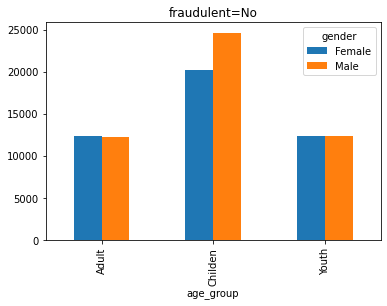

In [459]:
e.plot(kind='bar',title='fraudulent=No')

## 16. Is there any similarity in the amount claimed by males and females?

In [497]:
cul.groupby('gender')['claim_amount'].sum()

gender
Female    6381090
Male      7146248
Name: claim_amount, dtype: int64

<AxesSubplot:ylabel='claim_amount'>

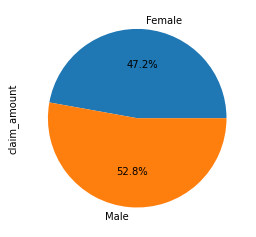

In [403]:
cul.groupby('gender')['claim_amount'].sum().plot(kind='pie',autopct='%2.1f%%',figsize=(4,5))

In [498]:
cul.groupby('gender')['claim_amount'].mean()

gender
Female    12062.551985
Male      12852.964029
Name: claim_amount, dtype: float64

<AxesSubplot:ylabel='claim_amount'>

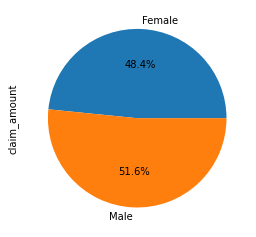

In [499]:
cul.groupby('gender')['claim_amount'].mean().plot(kind='pie',autopct='%2.1f%%',figsize=(4,5))

## 17. Is there any relationship between age category and segment?

In [355]:
q=cul.groupby(['Segment','age_group'])['Segment'].count().reset_index(name='count')

In [359]:
p=q.pivot(index = "Segment", columns = "age_group", values = "count")
p

age_group,Adult,Childen,Youth
Segment,,,
Gold,271.0,1.0,103.0
Platinum,245.0,1.0,116.0
Silver,248.0,NaN,100.0


<AxesSubplot:xlabel='Segment'>

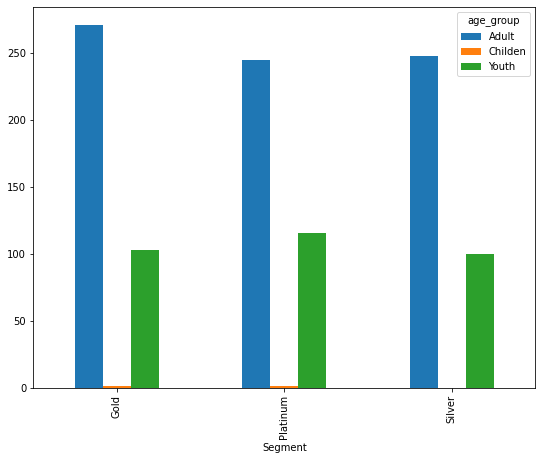

In [357]:
p.plot(kind='bar',figsize = (9,7))

## 19. Is there any difference between age groups and insurance claims?

In [434]:
cul.groupby('age_group')['total_policy_claims'].sum().reset_index()

,age_group,total_policy_claims
0,Adult,1196.695814
1,Childen,2.000000
2,Youth,523.173953


## 20. Is there any relationship between total number of policy claims and the claimed amount?


In [462]:
pc=cul.groupby('total_policy_claims').claim_amount.sum()
pc

total_policy_claims
1.000000    9752842
1.586977     139497
2.000000    1445373
3.000000    1111800
4.000000     655302
5.000000     230314
6.000000     142867
7.000000      46066
8.000000       3277
Name: claim_amount, dtype: int64

<AxesSubplot:xlabel='total_policy_claims'>

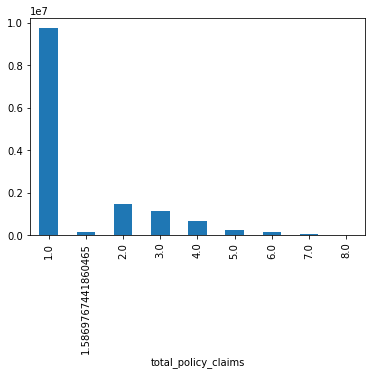

In [465]:
pc.plot.bar()

In [500]:
cul.groupby('total_policy_claims').total_policy_claims.count()

total_policy_claims
1.000000    785
1.586977     10
2.000000    105
3.000000     86
4.000000     59
5.000000     27
6.000000     10
7.000000      2
8.000000      1
Name: total_policy_claims, dtype: int64